In [1]:
import math
import numpy as np
import openrtdynamics2.lang as dy
import openrtdynamics2.py_execute as dyexe

from helper_fn import * 

In [2]:
system = dy.enter_system()

# the diagram
U = dy.float64(2.0)
active_system, _, _ = dy.signal_square(30, 0)  # changes between 0 and 1

with dy.sub_switch( "switch1", active_system ) as switch:

    with switch.new_subsystem('default_system') as system:
        # this is defined to be the default subsystem
        # the datatypes of the outputs defined here a
        # used for the main outputs of the function 
        # dy.sub_switch

        # inputs are [] (no inputs)

        x = dy.float64(0.0)
        v = dy.float64(0.0)

        system.set_switched_outputs([ x, v ])


    with switch.new_subsystem('running_system') as system:
        # inputs are [U]

        x = dy.signal()
        v = dy.signal()

        acc = dy.add( [ U, v, x ], [ 1, -0.1, -0.1 ] )

        v << dy.euler_integrator( acc, Ts=0.1, initial_state=-1.0 )
        x << dy.euler_integrator( v,   Ts=0.1 )

        system.set_switched_outputs([ x, v ])


        #  python3 -m http.server

output_x = switch.outputs[0].set_name("ox")
output_v = switch.outputs[1].set_name("ov")


# define output(s)
dy.append_primay_ouput(output_x, 'output_x')
dy.append_primay_ouput(output_v, 'output_v')
dy.append_primay_ouput(active_system, 'active_system')

# generate code for Web Assembly (wasm), requires emcc (emscripten) to build
code_gen_results = dy.generate_code(template=dy.WasmRuntime(), folder="generated/sub_switch", build=False)

#
dy.clear()

compiling system Subsystem1000_default_system (level 1)... 
determining the computation order...
building execution paths...
All dependencies are resolved.
compiling system Subsystem1001_running_system (level 1)... 
determining the computation order...
building execution paths...
All dependencies are resolved.
compiling system simulation (level 0)... 
determining the computation order...
building execution paths...
All dependencies are resolved.
Generated code will be written to generated/sub_switch .


In [3]:
compiled_system = dyexe.CompiledCode(code_gen_results)
sim_results = dyexe.run_batch_simulation(dyexe.SystemInstance(compiled_system), input_data={}, N=200)

In [4]:
sim_results['output_x']

array([ 0.00000000e+00,  0.00000000e+00, -1.00000000e-01, -1.79000000e-01,
       -2.37110000e-01, -2.74459900e-01, -2.91199191e-01, -2.87496629e-01,
       -2.63539894e-01, -2.19535229e-01, -1.55707071e-01, -7.22976597e-02,
        3.04333648e-02,  1.52209377e-01,  2.92737195e-01,  4.51707526e-01,
        6.28795416e-01,  8.23660720e-01,  1.03594858e+00,  1.26528989e+00,
        1.51130185e+00,  1.77358839e+00,  2.05174077e+00,  2.34533803e+00,
        2.65394759e+00,  2.97712571e+00,  3.31441810e+00,  3.66536044e+00,
        4.02947893e+00,  4.40629089e+00,  4.79530524e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [5]:
# assert_equal( sim_results['output_x'] , [ ] )

In [6]:
import numpy as np
import matplotlib.pyplot as plt

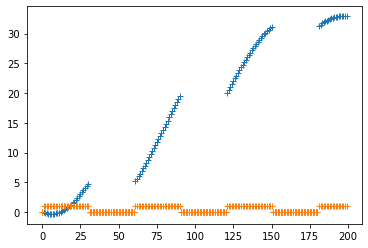

In [7]:
plt.figure()
plt.plot( sim_results['output_x'], '+'  )
plt.plot( sim_results['active_system'], '+'  )
plt.show()